# Tâche 8
Ce dernier notebook consiste à télécharger et à analyser la structure de bande électronique du NiO2.
#### Celui-ci sera subdiviser en trois parties :
    1. Déterminer la bande interdite
    2. Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion et illustrer sur le graphique de la structure de bande électronique
    3. calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.



## 1) Déterminer la bande interdite

In [51]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
import pymatgen.symmetry.analyzer as an
import pymatgen.electronic_structure.bandstructure as bst
import pymatgen.electronic_structure.plotter as bplt
import matplotlib.pyplot as plt
from numpy import *

with MPRester("50GdfyPDwCnkOUl2") as m:
    
    material_id = "mp-510753"   
    bandstruc = m.get_bandstructure_by_material_id(material_id)
    bandgap = bandstruc.get_band_gap()
    directbandgap = bandstruc.get_direct_band_gap()
    print("La valeur de la bande interdite vaut :", bandgap['energy']," [eV] et celle-ci est indirecte.")
    print("La valeur de la bande interdite directe vaut :", directbandgap,"[eV].")
    
    cbm = bandstruc.get_cbm()
    vbm = bandstruc.get_vbm()
    print("L'index de la première bande de conduction :",cbm['band_index'])
    print("L'index de la dernière bande de valence :",vbm['band_index'])

La valeur de la bande interdite vaut : 1.5036  [eV] et celle-ci est indirecte.
La valeur de la bande interdite directe vaut : 1.8303 [eV].
L'index de la première bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [14]})
L'index de la dernière bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})


## 2) Dispersion dans la bande de valence et de conduction

In [55]:
    #branchstruc1 = bandstruc.get_branch(14)
    #branchstruc2 = bandstruc.get_branch(13)
    
    
    bandplotobj = bplt.BSPlotter(bandstruc)
    
    BranchEnergies =  bandplotobj.bs_plot_data()['energy']
    Branchk = bandplotobj.bs_plot_data()['distances']    
    
    print("\n")
    
    ###############################distance entre chaque abscisse
    
    distance = zeros(len(Branchk))
    i=0
    while i < len(Branchk):
        distance[i]=Branchk[i][-1]-Branchk[i][0]
        i=i+1
    
    #############################gap d'énergie entre chaque point de la bande de valence
    
    energies_val_band = zeros(len(BranchEnergies['1']))
    i=0
    while i < len(BranchEnergies['1']):
        energies_val_band[i]=BranchEnergies['1'][i][13][-1]-BranchEnergies['1'][i][13][0]
        i=i+1
        
    #############################gap d'énergie entre chaque point de la bande de conduction
    
    energies_cond_band = zeros(len(BranchEnergies['1']))
    i=0
    while i < len(BranchEnergies['1']):
        energies_cond_band[i]=BranchEnergies['1'][i][14][-1]-BranchEnergies['1'][i][14][0]
        i=i+1
        

    #############################pentes
    i=0
    pente_val = zeros(len(energies_val_band))
    pente_cond = zeros(len(energies_cond_band))
    
    while i < len(pente_val):
        pente_val[i] = abs(energies_val_band[i]/distance[i])
        pente_cond[i] = abs(energies_cond_band[i]/distance[i])
        i = i+1
    print("En comptant les branches de gauche à droite à partir de 0, \n")
    print("--bande de valence-- \n")
    print("Branche avec la plus petite pente:",argmin(pente_val),"\t Valeur de cette pente:",min(pente_val))
    print("Branche avec la plus grande pente:",argmax(pente_val),"\t Valeur de cette pente:",max(pente_val),'\n')
    print("--bande de conduction-- \n")
    print("Branche avec la plus petite pente:",argmin(pente_cond),"\t Valeur de cette pente:",min(pente_cond))
    print("Branche avec la plus grande pente:",argmax(pente_cond),"\t Valeur de cette pente:",max(pente_cond))




En comptant les branches de gauche à droite à partir de 0, 

--bande de valence-- 

Branche avec la plus petite pente: 1 	 Valeur de cette pente: 0.17305342113248098
Branche avec la plus grande pente: 0 	 Valeur de cette pente: 1.1048233267132699 

--bande de conduction-- 

Branche avec la plus petite pente: 7 	 Valeur de cette pente: 0.05174547674544817
Branche avec la plus grande pente: 2 	 Valeur de cette pente: 0.5425459131682634


#### Ces résultats sont illustrés dans le graphique de structure de bande électronique ci-dessous :

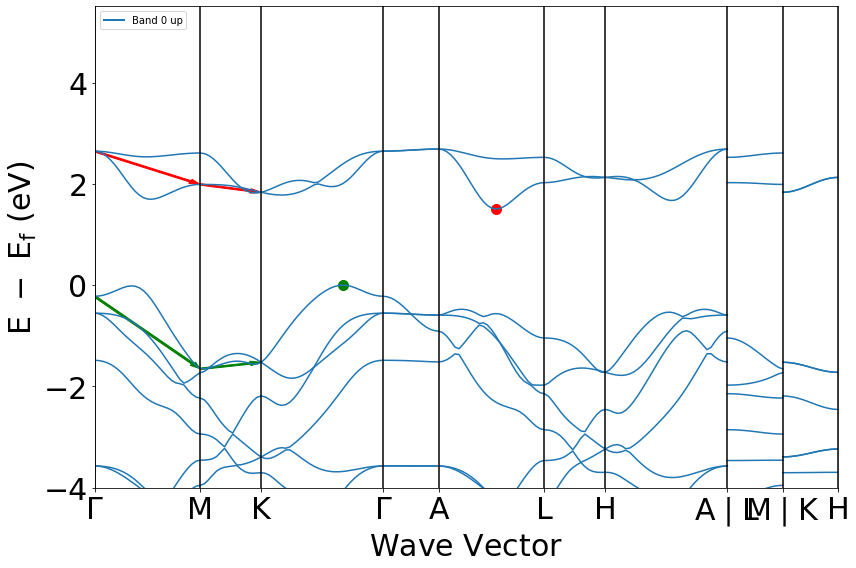

In [56]:
    bandplotobj.get_plot(vbm_cbm_marker=True)
    
    plt.arrow(Branchk[argmin(pente_val)][0],BranchEnergies['1'][argmin(pente_val)][13][0],Branchk[argmin(pente_val)][-1]-Branchk[argmin(pente_val)][0],BranchEnergies['1'][argmin(pente_val)][13][-1]-BranchEnergies['1'][argmin(pente_val)][13][0],width = 0.03,length_includes_head=True,color='green')
    plt.arrow(Branchk[argmax(pente_val)][0],BranchEnergies['1'][argmax(pente_val)][13][0],Branchk[argmax(pente_val)][-1]-Branchk[argmax(pente_val)][0],BranchEnergies['1'][argmax(pente_val)][13][-1]-BranchEnergies['1'][argmax(pente_val)][13][0],width = 0.03,length_includes_head=True,color='green')
    plt.arrow(Branchk[argmin(pente_val)][0],BranchEnergies['1'][argmin(pente_val)][14][0],Branchk[argmin(pente_val)][-1]-Branchk[argmin(pente_val)][0],BranchEnergies['1'][argmin(pente_val)][14][-1]-BranchEnergies['1'][argmin(pente_val)][14][0],width = 0.03,length_includes_head=True,color='red')
    plt.arrow(Branchk[argmax(pente_val)][0],BranchEnergies['1'][argmax(pente_val)][14][0],Branchk[argmax(pente_val)][-1]-Branchk[argmax(pente_val)][0],BranchEnergies['1'][argmax(pente_val)][14][-1]-BranchEnergies['1'][argmax(pente_val)][14][0],width = 0.03,length_includes_head=True,color='red')
    

## 3) Calcul de la masse effective
Pour terminer, je vais calculer la masse effective au sommet de la dernière bande de valence et celle à la base de la bande de conduction en supposant une dispersion parabolique.

In [43]:
################################# calcul de la masse effective 

    #bande de valence
    hbar=6.58212e-16
    kpoint_vbm_coord=vbm['kpoint'].cart_coords
    k=linalg.norm(kpoint_vbm_coord)
    E_k = vbm['energy']
    m_eff_v =  hbar**2 *k**2/(2*E_k)
    print('La masse effective au sommet de la bande de valence:', m_eff_v ,'[kg]')
    
    #bande de conduction 
    kpoint_cbm_coord=cbm['kpoint'].cart_coords
    k=linalg.norm(kpoint_cbm_coord)
    E_k = cbm['energy']
    m_eff_c =  hbar**2 *k**2/(2*E_k)
    print('La masse effective à la base de la bande de conduction:', m_eff_c ,'[kg]')

La masse effective au sommet de la bande de valence: 3.137428866228273e-32 [kg]
La masse effective à la base de la bande de conduction: 6.385926548280349e-32 [kg]
